# CONTEXT
The objective of this project is to apply exploratory analysis and regression techniques to identify which features affect home prices the most in the Melbourne Housing Market.

# DATA PRE-PROCESSING

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

__Reading a pdf fileuse pypdf library__



In [3]:
df=pd.read_csv("C:/Users/91728/Downloads/melbourne.csv")
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,...,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26-08-2017,6.3,3013.0,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


In [4]:
df.shape

(23547, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23547 non-null  category      
 1   Address        23547 non-null  category      
 2   Rooms          23547 non-null  int64         
 3   Type           23547 non-null  category      
 4   Price          18396 non-null  float64       
 5   Method         23547 non-null  category      
 6   SellerG        23547 non-null  category      
 7   Date           23547 non-null  datetime64[ns]
 8   Distance       23546 non-null  float64       
 9   Postcode       23546 non-null  float64       
 10  Bedroom2       19066 non-null  float64       
 11  Bathroom       19063 non-null  float64       
 12  Car            18921 non-null  float64       
 13  Landsize       17410 non-null  float64       
 14  BuildingArea   10018 non-null  float64       
 15  YearBuilt      1154

# VARIABLE TYPES

# ****Categorical Variables****

Based on the information below, the following variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects.
In addition, the Date variable will need to be converted to a date object.

___Identifying object column___

In [6]:
df.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

# ***Convert objects to categorical variables***

In [9]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [10]:
#converting to date objects
df['Date']=pd.to_datetime(df['Date'])

# ****Numerical Variables****

A statistical summary of the numeric variables above indicates that Postcode is being treated as numeric when it should be identified as categorical. This feature will need to be converted to the correct data type.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,23547.0,2.976048e+00,0.974501,1.00000,2.0000,3.0000,4.000000e+00,1.200000e+01
Price,18396.0,1.056697e+06,641921.666710,85000.00000,633000.0000,880000.0000,1.302000e+06,9.000000e+06
Distance,23546.0,1.030651e+01,6.016318,0.00000,6.2000,9.5000,1.300000e+01,4.810000e+01
Postcode,23546.0,3.109783e+03,94.522190,3000.00000,3047.0000,3101.0000,3.150000e+03,3.978000e+03
Bedroom2,19066.0,2.951956e+00,0.996032,0.00000,2.0000,3.0000,4.000000e+00,3.000000e+01
Bathroom,19063.0,1.570897e+00,0.712684,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,18921.0,1.626235e+00,0.974048,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,17410.0,5.517835e+02,3544.288014,0.00000,181.0000,448.0000,6.560000e+02,4.330140e+05
BuildingArea,10018.0,1.545279e+02,462.535765,0.00000,95.0000,129.0000,1.800000e+02,4.451500e+04
YearBuilt,11540.0,1.964637e+03,37.595504,1196.00000,1940.0000,1970.0000,2.000000e+03,2.106000e+03


### ***Convert numeric variables to categorical***

In [14]:
num_cats = ['Postcode']  

for colname in num_cats:
    df[colname] = df[colname].astype('category')   

#*** Confirm changes***
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23547 non-null  category      
 1   Address        23547 non-null  category      
 2   Rooms          23547 non-null  int64         
 3   Type           23547 non-null  category      
 4   Price          18396 non-null  float64       
 5   Method         23547 non-null  category      
 6   SellerG        23547 non-null  category      
 7   Date           23547 non-null  datetime64[ns]
 8   Distance       23546 non-null  float64       
 9   Postcode       23546 non-null  category      
 10  Bedroom2       19066 non-null  float64       
 11  Bathroom       19063 non-null  float64       
 12  Car            18921 non-null  float64       
 13  Landsize       17410 non-null  float64       
 14  BuildingArea   10018 non-null  float64       
 15  YearBuilt      1154

***Duplicate Variables***

According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources. I will investigate these columns further to determine if one should be removed from the dataset.


In [15]:
# Examine Rooms v Bedroom2
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,2017-08-26,27.2,3024.0,...,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0,0.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,2017-08-26,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0,NaN
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,2017-08-26,12.7,3085.0,...,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0,0.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,2017-08-26,6.3,3013.0,...,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,0.0


The differences between these variables are minimal so keeping both would only be duplicating information. Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.

In [16]:
# Drop columns
df = df.drop(['Bedroom2','Rooms v Bedroom2'],1)

C:\Users\91728\AppData\Local\Temp/ipykernel_20980/644686674.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Bedroom2','Rooms v Bedroom2'],1)


__****Feature Engineering****__

The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home. As such, home age can be expressed in terms of historic (greater than 50 years old) vs non-historic (less than 50 years old) to get the heart of this information in a more condensed way, allowing for better analysis and visualization.

In [17]:
# Add age variable
df['Age'] = 2017 - df['YearBuilt']

# Identify historic homes
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')

# Convert to Category
df['Historic'] = df['Historic'].astype('category')

__MISSING DATA__

Based on a quick look at the number of entries for each variable, there appears to be missing information in the dataset. I will explore which features are missing the most information.

In [18]:
# Number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         23547 non-null  category      
 1   Address        23547 non-null  category      
 2   Rooms          23547 non-null  int64         
 3   Type           23547 non-null  category      
 4   Price          18396 non-null  float64       
 5   Method         23547 non-null  category      
 6   SellerG        23547 non-null  category      
 7   Date           23547 non-null  datetime64[ns]
 8   Distance       23546 non-null  float64       
 9   Postcode       23546 non-null  category      
 10  Bathroom       19063 non-null  float64       
 11  Car            18921 non-null  float64       
 12  Landsize       17410 non-null  float64       
 13  BuildingArea   10018 non-null  float64       
 14  YearBuilt      11540 non-null  float64       
 15  CouncilArea    1565

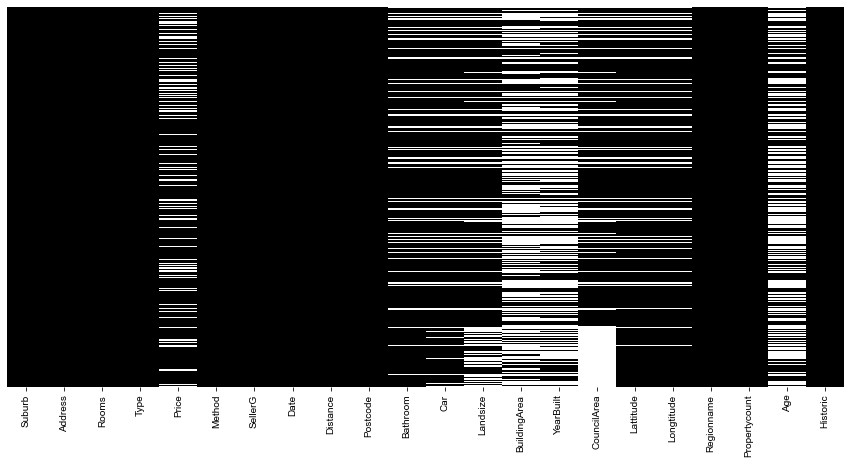

In [23]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [24]:
# Count of missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
Age              12007
Historic             0
dtype: int64

In [26]:
#Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.875398
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.004247
Postcode          0.004247
Bathroom         19.042766
Car              19.645815
Landsize         26.062768
BuildingArea     57.455302
YearBuilt        50.991634
CouncilArea      33.511700
Lattitude        18.278337
Longtitude       18.278337
Regionname        0.004247
Propertycount     0.004247
Age              50.991634
Historic          0.000000
dtype: float64

There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.

__View missing data__

In [27]:
#dataset[dataset['Bedroom2'].isnull()]
#To remove rows missing data in a specific column 
# dataset =dataset[pd.notnull(dataset['Price'])]

# To remove an entire column
# dataset = dataset.drop('Bedroom2',axis = 1)

# Remove rows missing data
df=df.dropna()

# Confirm that observations missing data were removed  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 2 to 19739
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         6196 non-null   category      
 1   Address        6196 non-null   category      
 2   Rooms          6196 non-null   int64         
 3   Type           6196 non-null   category      
 4   Price          6196 non-null   float64       
 5   Method         6196 non-null   category      
 6   SellerG        6196 non-null   category      
 7   Date           6196 non-null   datetime64[ns]
 8   Distance       6196 non-null   float64       
 9   Postcode       6196 non-null   category      
 10  Bathroom       6196 non-null   float64       
 11  Car            6196 non-null   float64       
 12  Landsize       6196 non-null   float64       
 13  BuildingArea   6196 non-null   float64       
 14  YearBuilt      6196 non-null   float64       
 15  CouncilArea    6196 

__OUTLIERS__

The statistical summary revealed minimum values of zero for Landsize and BuildingArea that seem odd. Also, there is a max price of $8.4 million in the dataset. These observations will need to be investigated further to determine their validity and whether they should be included in the dataset for analysis.

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407e+00,0.971079,1.00000,2.000000,3.00000,4.000000e+00,8.000000e+00
Price,6196.0,1.068828e+06,675156.427502,131000.00000,620000.000000,880000.00000,1.325000e+06,9.000000e+06
Distance,6196.0,9.751097e+00,5.612065,0.00000,5.900000,9.00000,1.240000e+01,4.740000e+01
Bathroom,6196.0,1.576340e+00,0.711362,1.00000,1.000000,1.00000,2.000000e+00,8.000000e+00
Car,6196.0,1.573596e+00,0.929947,0.00000,1.000000,1.00000,2.000000e+00,1.000000e+01
Landsize,6196.0,4.710069e+02,897.449881,0.00000,152.000000,373.00000,6.280000e+02,3.700000e+04
BuildingArea,6196.0,1.415686e+02,90.834824,0.00000,91.000000,124.00000,1.700000e+02,3.112000e+03
YearBuilt,6196.0,1.964082e+03,38.105673,1196.00000,1940.000000,1970.00000,2.000000e+03,2.018000e+03
Lattitude,6196.0,-3.780790e+01,0.075850,-38.16492,-37.855438,-37.80225,-3.775820e+01,-3.745709e+01
Longtitude,6196.0,1.449902e+02,0.099165,144.54237,144.926198,144.99580,1.450527e+02,1.455264e+02


In [29]:
df[df['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [30]:
df[df['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne,-37.7953,144.9437,Northern Metropolitan,6821.0,17.0,Contemporary


In [32]:
df[df['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,0.0,60.00,1970.0,Yarra,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,0.0,50.00,2013.0,Yarra,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,9/17 Howitt St,2,u,570000.0,VB,Ray,2017-07-29,2.7,3141.0,...,0.0,64.00,1965.0,Stonnington,-37.84679,145.00206,Southern Metropolitan,14887.0,52.0,Historic
19685,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,2017-07-29,5.0,3182.0,...,0.0,82.00,1930.0,Port Phillip,-37.85911,144.97900,Southern Metropolitan,13240.0,87.0,Historic
19710,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,2017-07-29,12.9,3043.0,...,0.0,66.32,1980.0,Hume,-37.69815,144.88019,Western Metropolitan,3296.0,37.0,Contemporary
19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,2017-07-29,6.8,3016.0,...,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,50.0,Historic


After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential real estate in which the structure comes up to or very near the edge of the property line. Therefore, these observations are valid and will remain the data set.

However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to have a size of zero. Also, this observation is priced usually high at $8.4M (the outlier identified earlier), further confirming a possible error in the data point. For these two reasons, this observation will be removed.

In [7]:
#for identifying the null value
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
23543,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
23544,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
23545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


***Column having atleast one  missing value***
 * a> when axis is zero  then it operates on column
 * b> when axis is one the it operates on column

In [8]:

df.isnull().any(axis=0)


Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [14]:
#any rows having all missing values
df.isnull().all()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [15]:
#sum of missing value in all the rows
df.isnull().sum(axis=1)

0        3
1        2
2        0
3        3
4        0
        ..
23542    2
23543    8
23544    4
23545    1
23546    2
Length: 23547, dtype: int64

In [16]:
#summing up the missing values (column-wise)
round (100*(df.isnull().sum()/len(df.index)),2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64

In [17]:
#few of the columns whic has so much of missin value we will drop that one
df=df.drop('BuildingArea',axis=1)
df=df.drop('YearBuilt',axis=1)
df=df.drop('CouncilArea',axis=1)
round (100*(df.isnull().sum()/len(df.index)),2)


Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64

In [18]:
df[df.isnull().sum(axis=1)>5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10-12-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10-12-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,Templestowe Lower,1/207 Manningham Rd,2,u,550000.0,PI,Barry,26-08-2017,12.4,3107.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,5420.0
23499,Thornbury,1/128 Dundas St,2,t,770000.0,PI,McGrath,26-08-2017,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
23502,Thornbury,111 Pender St,2,t,858000.0,S,Jellis,26-08-2017,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
23508,Toorak,21/1059 Malvern Rd,2,u,720000.0,VB,Beller,26-08-2017,4.1,3142.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7217.0


In [19]:
#count the number of rows having >5 missing values
len(df[df.isnull().sum(axis=1)>5])

4278

In [20]:
#calculate the percentage 
100*(len(df[df.isnull().sum(axis=1)>5].index)/len(df.index))

18.16791948018856

In [21]:
## we will go the row having less than 5 missing value bcz still we have 80% of data available for the manupulation and cahnge

df=df[df.isnull().sum(axis=1)<5]

round(100*(df.isnull().sum()/len(df.index)),2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.53
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.83
Bathroom          0.85
Car               1.59
Landsize          9.45
Lattitude         0.14
Longtitude        0.14
Regionname        0.00
Propertycount     0.00
dtype: float64

In [22]:
#removing the nan price rows
df=df[~np.isnan(df['Price'])]
round(100*(df.isnull().sum()/len(df.index)),2)

Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         1.05
Bathroom         1.07
Car              1.76
Landsize         9.83
Lattitude        0.15
Longtitude       0.15
Regionname       0.00
Propertycount    0.00
dtype: float64

In [23]:
df['Landsize'].describe()

count     13603.000000
mean        558.116371
std        3987.326586
min           0.000000
25%         176.500000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [24]:
df=df[~np.isnan(df['Landsize'])]

In [25]:
round(100*(df.isnull().sum()/len(df.index)),2)

Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         0.00
Bathroom         0.01
Car              0.46
Landsize         0.00
Lattitude        0.16
Longtitude       0.16
Regionname       0.00
Propertycount    0.00
dtype: float64